In [27]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')

print(data.head())

print(data.info())

print(data.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


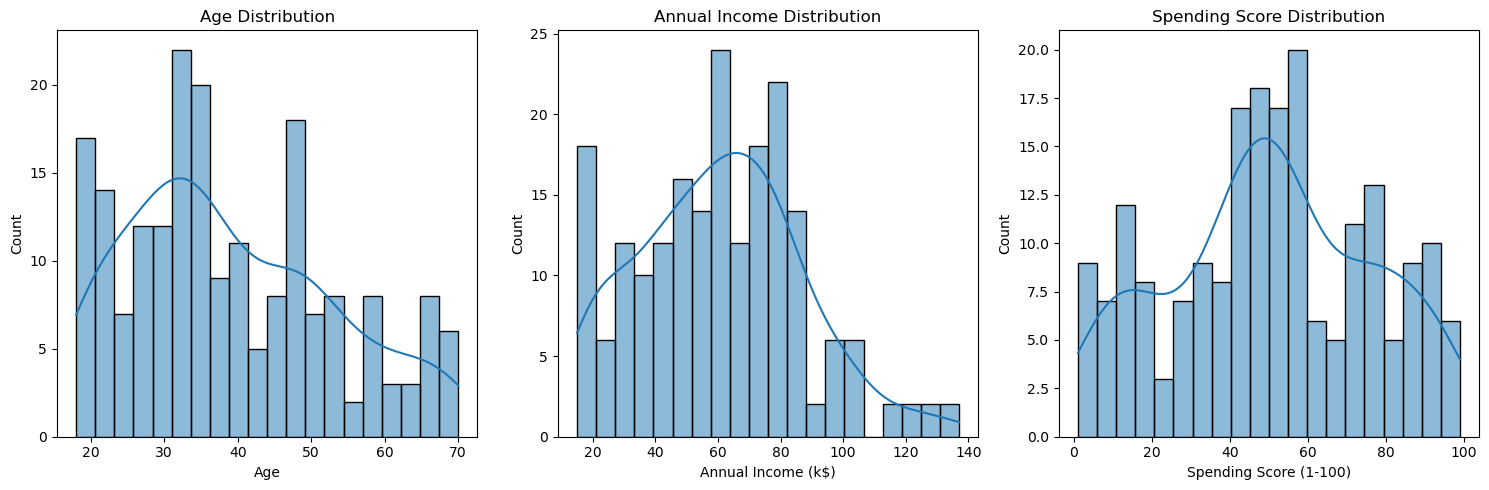

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

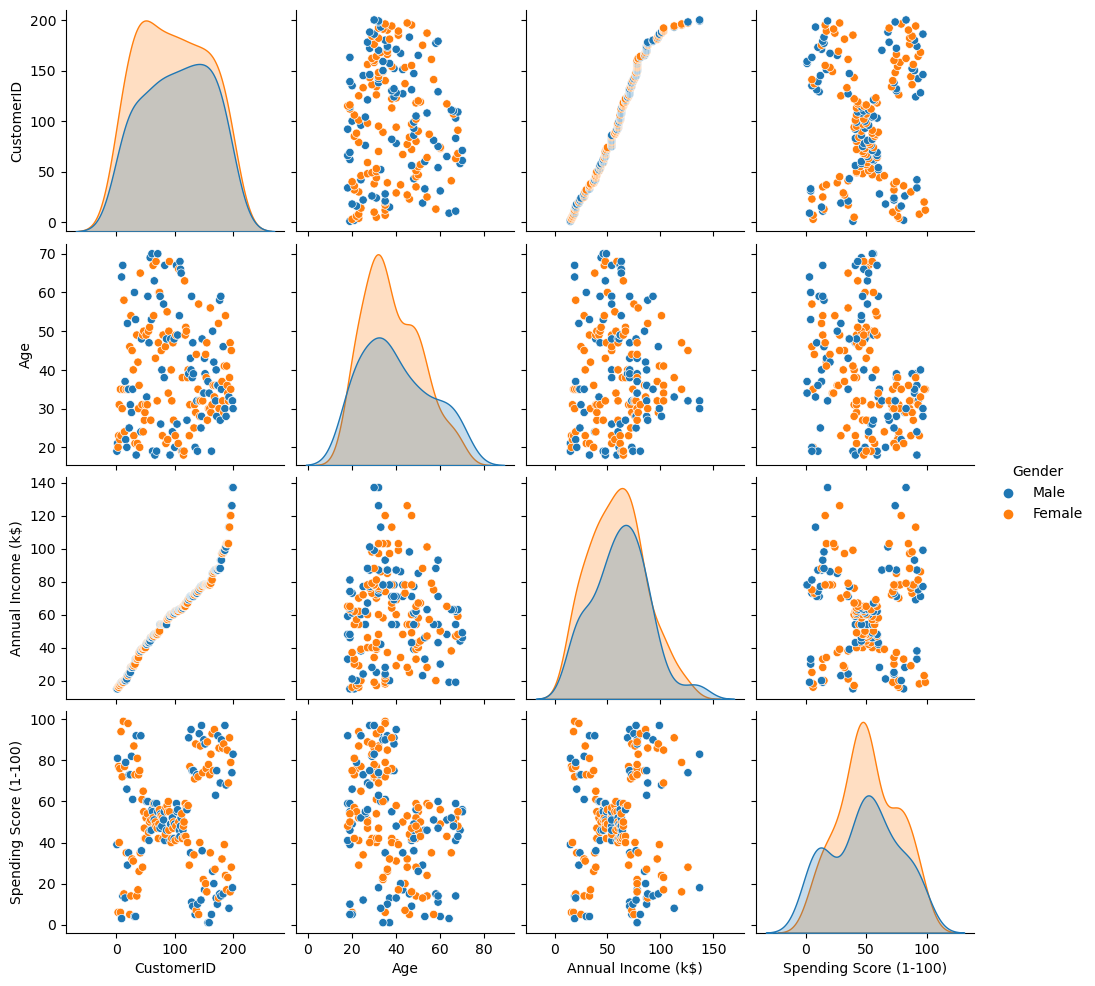

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

sns.pairplot(data, hue='Gender')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\a

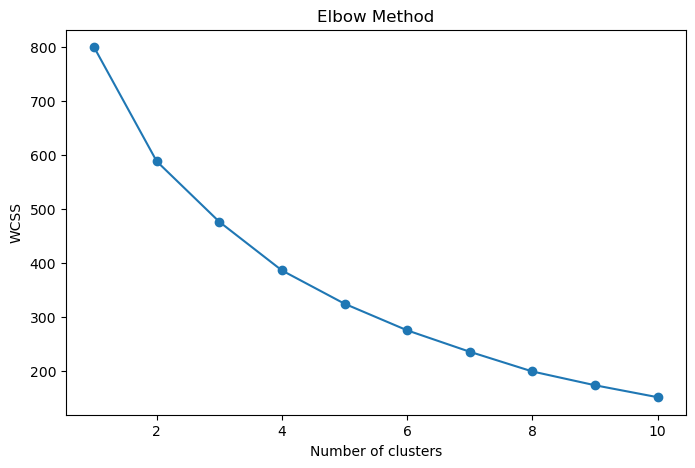

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters


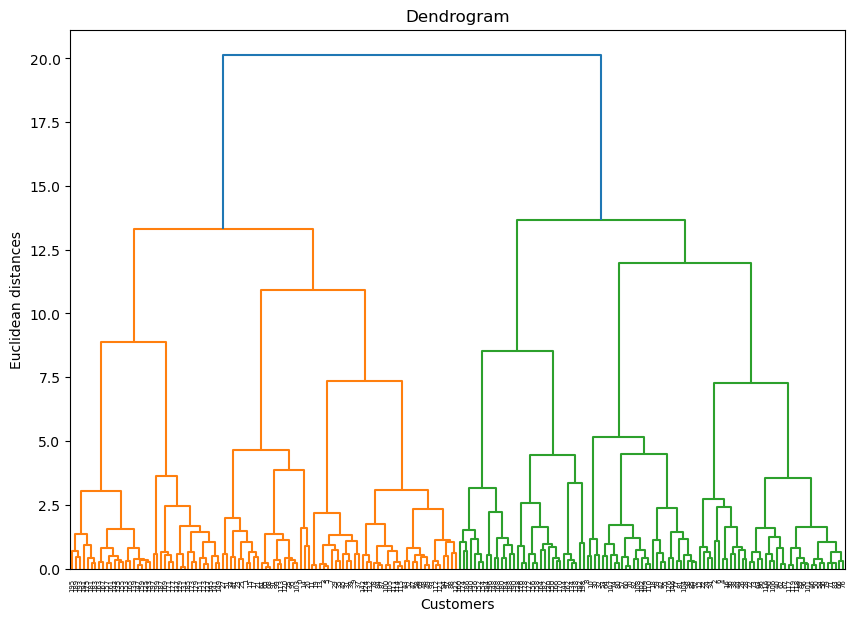

D:\anaconda\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [31]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
data['HCluster'] = hc.fit_predict(X_scaled)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        102.854545  0.000000  28.345455           60.800000   
1        103.375000  1.000000  28.250000           62.000000   
2         66.651163  0.000000  48.720930           46.186047   
3         72.612903  1.000000  55.903226           48.774194   
4        167.451613  0.548387  40.419355           90.000000   

         Spending Score (1-100)  HCluster  
Cluster                                    
0                     68.654545  0.381818  
1                     71.675000  0.550000  
2                     39.674419  2.697674  
3                     38.806452  3.677419  
4                     15.741935  2.000000  


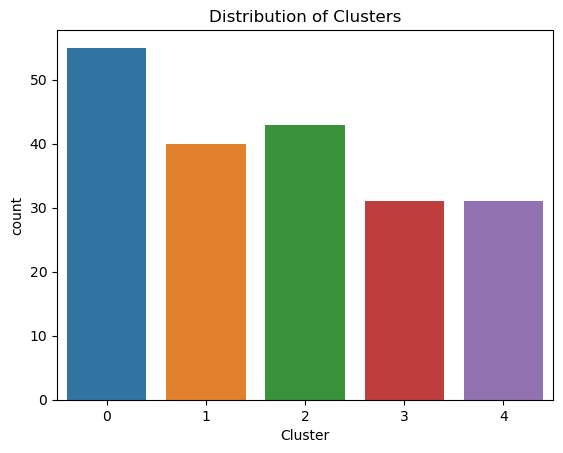

In [32]:
cluster_profile = data.groupby('Cluster').mean()
print(cluster_profile)

sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Clusters')
plt.show()


In [33]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior', 'Elder'])


SVM Model Accuracy: 0.975
Decision Tree Model Accuracy: 0.95
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      0.86      0.92         7
           4       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00         7
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00         7
           4       0.89      0.89      0.89         9

    accuracy                           0.95        40
   m

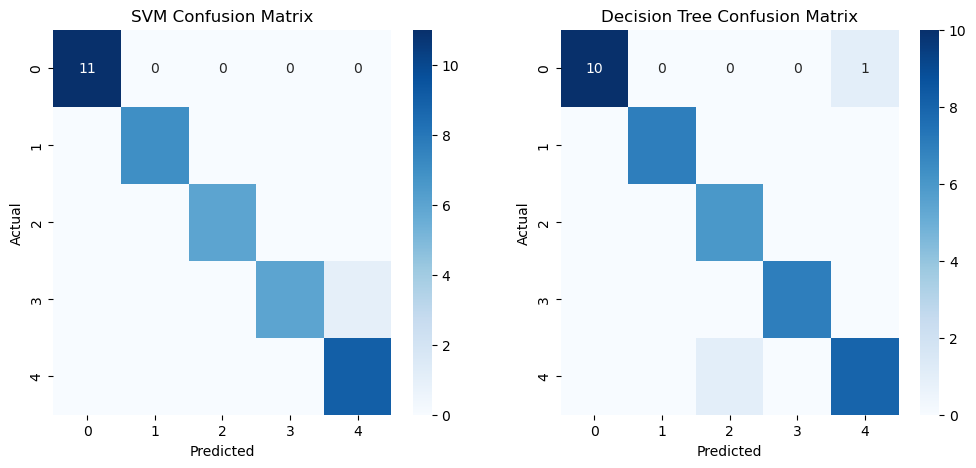

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, clusters, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_tree))

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('SVM Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_tree, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Decision Tree Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()
